# Instalação e importação dos pacotes

In [ ]:
#Biblioteca de funções de manipulação de dados

%pip install pandas

#Biblioteca de funções de visualização de dados 

%pip install seaborn

#Biblioteca para construção de modelos preditivos

%pip install sklearn

In [2]:
#Importação dos pacotes

import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Primeiras Análises

In [3]:
#Importação dos dados

clientes = pd.read_csv("D:\\Machine Learning\\Validação de Empréstimos\\clientes.csv")
clientes.head()

,cod_cliente,sexo,estado_civil,dependentes,educacao,empregado,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,imovel,aprovacao_emprestimo
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


A função head() traz as primeiras linhas de um Data Frame. Por default ele traz as 5 primeiras linhas, mas é possível mostrar a quantidade que você quiser, basta inserir a quantidade de linhas desejadas entre os parenteses.

Esses dados são referentes ao cadastro de clientes de um banco. Onde: a coluna cod_cliente traz o código de cada cliente; a coluna sexo o gênero de cada cliente; estado_civil se é casodo (Yes) ou não é casado (No); dependentes é a quantidade de dependentes que cada cliente tem; educacao é o nível de escolaridade; renda é renda mensal; renda_conjuge é a renda do conjuge do cliente; emprestimo diz se o cliente tem algum emprestimo já em seu nome e o montante, caso não tenha nenhum empréstimo não terá informação; prestacao_mensal são debitos mensais que o cliente tem; historico_credito traz informações se o cliente já fez alguma operação de crédito (1) e se não fez nenhuma operação (0); imovel é o tipo de imovel que esse cliente tem urbano, rural ou semiurbano; aprovacao_emprestimo traz a informação se o emprestimo para essa pessoa foi aprovado(Y) ou não(N)

In [4]:
# Verificação da dimensão do Data Frame

clientes.shape

(614, 13)

Nesse caso é montada um tupla com a quantidade de linhas, 614, e colunas, 13.

In [5]:
# Verificando as informações dos campos do dataset clientes

clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cod_cliente           614 non-null    object 
 1   sexo                  601 non-null    object 
 2   estado_civil          611 non-null    object 
 3   dependentes           599 non-null    object 
 4   educacao              614 non-null    object 
 5   empregado             582 non-null    object 
 6   renda                 614 non-null    int64  
 7   renda_conjuge         614 non-null    object 
 8   emprestimo            592 non-null    float64
 9   prestacao_mensal      600 non-null    float64
 10  historico_credito     564 non-null    float64
 11  imovel                614 non-null    object 
 12  aprovacao_emprestimo  614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


É possível observar que existem colunas que tem dados nulos. Pois temos um total de 614 dados em cada coluna e tem colunas que tem menos dados registrados como não nulos. Por exemplo, a coluna sexo tem registrados 601 dados não nulos, logo nessa coluna temos 13 dados nulos. Mais a frente esses dados serão devidamente tratados.

In [6]:
#Vrificando a quantidade de valores nulos/ausentes

clientes.isnull().sum()

cod_cliente              0
sexo                    13
estado_civil             3
dependentes             15
educacao                 0
empregado               32
renda                    0
renda_conjuge            0
emprestimo              22
prestacao_mensal        14
historico_credito       50
imovel                   0
aprovacao_emprestimo     0
dtype: int64

Os resultados acima mostram a quantidade de valores nulos/ausentes em cada caoluna do nosso Data Frame.

In [7]:
#Verificando a quantidade de valores duplicados

clientes.duplicated().sum()

0

Logo, não há valores duplicados em nossos dados.

# Conhecendo Dados Estatísticos das Variáveis

In [8]:
#Estatística Descritiva das Variáveis

clientes.describe()

,renda,emprestimo,prestacao_mensal,historico_credito
count,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,146.412162,342.00000,0.842199
std,6109.041673,85.587325,65.12041,0.364878
min,150.000000,9.000000,12.00000,0.000000
25%,2877.500000,100.000000,360.00000,1.000000
50%,3812.500000,128.000000,360.00000,1.000000
75%,5795.000000,168.000000,360.00000,1.000000
max,81000.000000,700.000000,480.00000,1.000000


Pelos dados mostrados acima é possível ver que nossa base de dados tem informações sobre clientes em situação financeira bem variadas. Por exemplo, em nossa instituição financeira temos clientes com renda de R$ 150,00 e clientes com renda de R$ 81000,00. Então estamos com uma base de dados bem diversificada, como o objetivo é criar um sistema de previsão de aprovação de empréstimos essa base de dados nos fornece situações bem diversificadas, ou seja, é uma boa base dados.

Em relação aos quartis, podemos ver que 25% dos clientes tem renda inferior a R$ 2877,50, 50% tem renda inferior a R$ 3812,00 e 75% tem renda inferior a R$ 5795,00. Esses dados mostram que a maioria dos nossos clientes tem renda de 5 - 6 salários mínimos. Ou seja, embora existam clientes que tenham rendas bem elevadas, eles são pontos fora da realidade da maioria. Um fato esperado, pois uma renda de R$ 81000,00 não é algo comum de se ter.

In [9]:
#Tabela de Frequência da Variável "aprovação_emprestimos" - Nossa Classe a ser Predita

clientes['aprovacao_emprestimo'].value_counts()

Y    422
N    192
Name: aprovacao_emprestimo, dtype: int64

Podemos ver que dentre nossos clientes, 422 tiveram seus pedidos de emprétimo aceitos e 192 tiveram seus pedidos rejeitados.

In [10]:
#Tabela de Frequência da Variável "historico_credito"

clientes['historico_credito'].value_counts()

1.0    475
0.0     89
Name: historico_credito, dtype: int64

Ou seja, 475 dos clientes já acionaram alguma operação de crédito e 89 nunca o fizeram.

## Criando Gráficos

[Text(0.5, 0, 'Aprovação Empréstimo'),
 Text(0, 0.5, 'Quantidade'),
 Text(0.5, 1.0, 'Situação dos Pedidos de Empréstimos')]

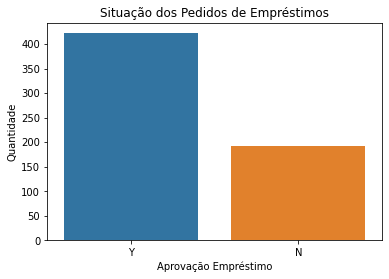

In [11]:
#Gráfico de barras para a variável aprovacao_emprestimos

g1 = sns.countplot(clientes['aprovacao_emprestimo'])
g1.set(xlabel="Aprovação Empréstimo",ylabel="Quantidade",title="Situação dos Pedidos de Empréstimos")

[Text(0.5, 0, 'Histórico Crédito'),
 Text(0, 0.5, 'Quantidade'),
 Text(0.5, 1.0, 'Histórico de Crédito dos Clientes')]

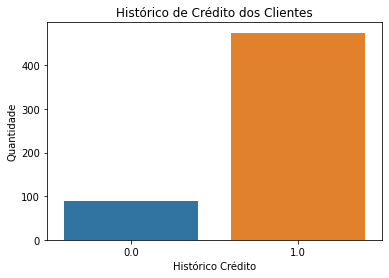

In [12]:
#Gráfico de barras para a variável historico_credito

g1 = sns.countplot(clientes['historico_credito'])
g1.set(xlabel="Histórico Crédito",ylabel="Quantidade",title="Histórico de Crédito dos Clientes")

[Text(0.5, 0, 'Nível de Escolaridade'),
 Text(0, 0.5, 'Quantidade'),
 Text(0.5, 1.0, 'Nível de Escolaridade dos Clientes')]

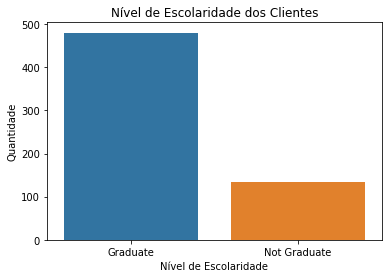

In [13]:
#Gráfico de barras para a variável educacao

g1 = sns.countplot(clientes['educacao'])
g1.set(xlabel="Nível de Escolaridade",ylabel="Quantidade",title="Nível de Escolaridade dos Clientes")

[Text(0.5, 0, 'Gênero'),
 Text(0, 0.5, 'Quantidade'),
 Text(0.5, 1.0, 'Quantidade de Homens e Mulheres')]

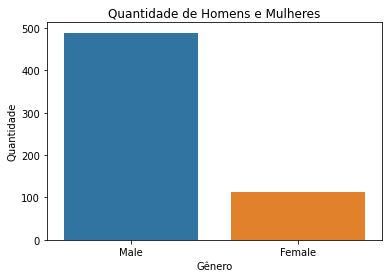

In [14]:
#Gráfico de barras para a variável sexo

g1 = sns.countplot(clientes['sexo'])
g1.set(xlabel="Gênero",ylabel="Quantidade",title="Quantidade de Homens e Mulheres")

[Text(0.5, 0, 'Tipos de Imóvel'),
 Text(0, 0.5, 'Quantidade'),
 Text(0.5, 1.0, 'Quantidade/Tipo de Imóvel')]

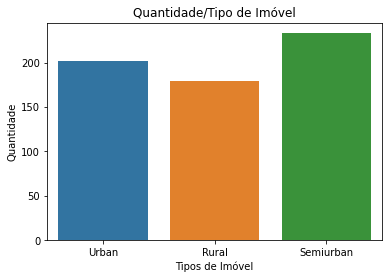

In [15]:
#Gráfico de barras para a variável imovel

g1 = sns.countplot(clientes['imovel'])
g1.set(xlabel="Tipos de Imóvel",ylabel="Quantidade",title="Quantidade/Tipo de Imóvel")

[Text(0.5, 0, 'Quantidade de Dependentes'),
 Text(0, 0.5, 'Quantidade de Clientes'),
 Text(0.5, 1.0, 'Quantidade de Clientes/Quantidade de Dependentes')]

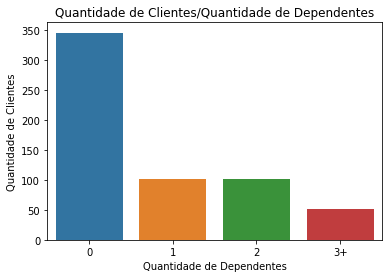

In [16]:
#Gráfico de barras para a variável dependentes

g1 = sns.countplot(clientes['dependentes'])
g1.set(xlabel="Quantidade de Dependentes",ylabel="Quantidade de Clientes",title="Quantidade de Clientes/Quantidade de Dependentes")

[Text(0.5, 0, 'Situação Pessoal'),
 Text(0, 0.5, 'Quantidade de Clientes'),
 Text(0.5, 1.0, 'Quantidade de Clientes/Situação Pessoal')]

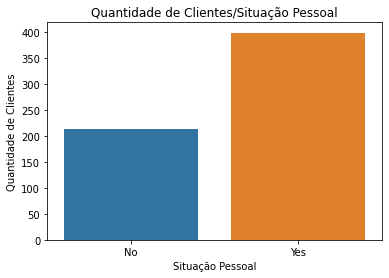

In [17]:
#Gráfico de barras para a variável estado_civil

g1 = sns.countplot(clientes['estado_civil'])
g1.set(xlabel="Situação Pessoal",ylabel="Quantidade de Clientes",title="Quantidade de Clientes/Situação Pessoal")

[Text(0.5, 0, 'Situação Profissional'),
 Text(0, 0.5, 'Quantidade de Clientes'),
 Text(0.5, 1.0, 'Quantidade de Clientes/Situação Profissional')]

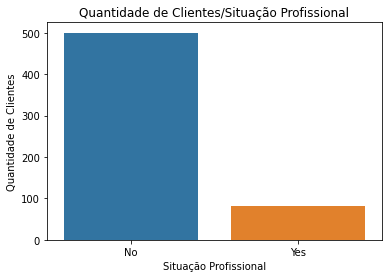

In [18]:
#Gráfico de barras para a variável empregado

g1 = sns.countplot(clientes['empregado'])
g1.set(xlabel="Situação Profissional",ylabel="Quantidade de Clientes",title="Quantidade de Clientes/Situação Profissional")

Os gráficos de barra tem por essencia mostrar o quantitativo de dados que temos por cada categpria, sendo assim é até possível fazer um pararlelo entre o gráfico de barra e a função value_counts(). O gráfico de barras é uma demonstração gráfica (visual) da função value_counts().

Dentre nosso resultados, é possível observar que a maioria dos pedidos de empréstimo foram aceitos. Um fato interessante se compararmos com a situação profissional dos clientes, onde mostra que a maioria não está empregada. Contudo, podemos inferir que não estar empregado não quer dizer não ter renda, pois vimos que 50% dos clientes tem renda superior a R$3812,50, logo podemos estar tratando de empregados informais sem carteira assinada.

Outro fato interessante é que a maioria dos clientes é casado, porém a maioria dos clientes não tem dependentes. Mostrando uma tendência dos casais mais jovens, onde a quantidade de filhos é pequena ou até mesmo optam por não ter filhos. Ainda podemos inferir que por se tratarem de casais mais jovens ou recém formados, possam estar buscando empréstimos para construir/reformar sua casa ou adquirir móveis/eletrodomésticos.

Ainda vemos que a maioria dos clientes tem curso superior finalizado e que, em relação a moradia, existe um nivelamento quanto onde esses clientes vivem. Contudo ainda se destacam propriedades semiurbanas, então podemos ver uma tendência das pessoas estrem morando mais em cidades vizinhas as capitais/centros urbanos, este fato pode ser visto como uma saturação dos centros urbanos, mas também pode ser a busca por locais mais tranquilos e até baratos de se habitar.

[Text(0.5, 0, 'Renda'),
 Text(0, 0.5, 'Quantidade de Clientes'),
 Text(0.5, 1.0, 'Histograma da Distribuição de Renda')]

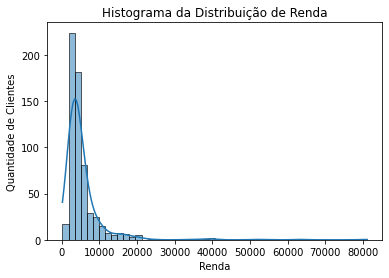

In [19]:
#Gráfico histograma para variável renda

g2 = sns.histplot(clientes['renda'],bins=50,kde=True)
g2.set(xlabel="Renda",ylabel="Quantidade de Clientes",title="Histograma da Distribuição de Renda")

[Text(0.5, 1.0, 'Boxplot da Distribuição de Renda')]

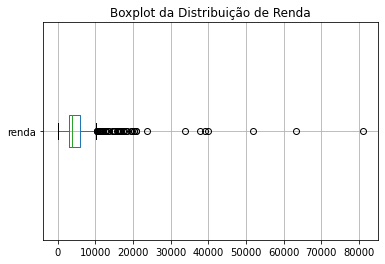

In [20]:
#Gráfico de distribuição dos dados da variável renda
g3 = clientes.boxplot(column='renda',vert=False)
g3.set(title="Boxplot da Distribuição de Renda")

O histograma e o boxplot servem para avaliar a distribuição dos nossos dados.

No histograma vemos a distribuição dos dados referente a quantidade e o valor que tem maior quantidades de dados. Como podemos ver, esse gráfico é dividido em intervalos, então cada barra representa um intervalo de valores. As barras maiores representam o intervalo de valores que tem maior quantidades de dados que o representa. Sendo assim, é possível observar que a maioria dos clientes tem renda concentrada entorno de R$ 5000,00, como vimos anteriormente.

O boxplot serve para observar a distribuição de acordo com os quartis. Cada linha da caixa representa um quartil (25%, 50% e 75%). Um dos pontos fortes desse gráfico é a possibilidade de observar os outlier, que são os valores que ficam muito acima ou muito abaixo da distribuição normal. Os outliers são representados pelos círculos. Ou seja, embora tenhamos visto que a maioria dos clientes tenha renda em aproximadamente R$ 5000,00, existem aqueles clientes que tem bem superior a esse valor, chagndo até superar R$ 80000,00. Em alguns casos esses valores de outliers são tratados e até elimindados da análise, pois são "pontos fora da curva". Mas isso é papel do analista determinar a relevância ou não desses dados.

[Text(0.5, 0, 'Empréstimo'),
 Text(0, 0.5, 'Quantidade de Clientes'),
 Text(0.5, 1.0, 'Histograma da Distribuição do Montante do Empréstimo Pedido')]

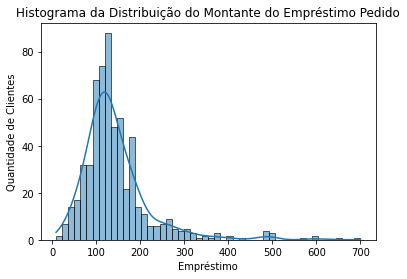

In [21]:
#Gráfico histograma para variável emprestimo

g2 = sns.histplot(clientes['emprestimo'],bins=50,kde=True)
g2.set(xlabel="Empréstimo",ylabel="Quantidade de Clientes",title="Histograma da Distribuição do Montante do Empréstimo Pedido")

[Text(0.5, 1.0, 'Boxplot da Distribuição do Montante do Empréstimo Pedido')]

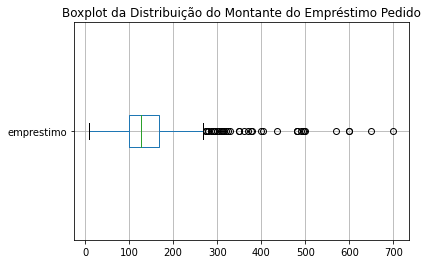

In [22]:
#Gráfico de distribuição dos dados da variável emprestimo
g3 = clientes.boxplot(column='emprestimo',vert=False)
g3.set(title="Boxplot da Distribuição do Montante do Empréstimo Pedido")

[Text(0.5, 0, 'Empréstimo'),
 Text(0, 0.5, 'Renda'),
 Text(0.5, 1.0, 'Correlação Empréstimo x Renda')]

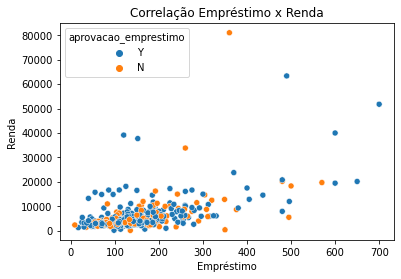

In [23]:
#Correlação entre as variáveis emprestimo x renda - Gráfico de dispersão

g4 = sns.scatterplot(data=clientes,x='emprestimo',y='renda',hue='aprovacao_emprestimo')
g4.set(xlabel="Empréstimo",ylabel="Renda",title="Correlação Empréstimo x Renda")

O gráfico de dispersão é muito útil para fazer estudos de correlação entre variáveis e avaliar o resultado que a combinação delas gera.

Em nosso exemplo, fizemos o estudo da correlação entre montante do empréstimo e renda. A primeira observação podemos ver que para valores de empréstimo mais baixos a renda não influencia muito, tendo situações de aprovação e reprovação. É verdade que vemos uma maior quantidade de situações de aprovação, mas esse fato já foi evidenciado na contagem dos casos onde tivemos uma amior frquência de aceitação.

O fato interessante ocorre quando o valor do empréstimo cresce. Quando isso ocorre temos uma maior interferência da renda do cliente, ou seja, para maiores montantes de empréstimos, a operação terá uma tendência de ser aceita se o cliente tiver uma renda mais elevada.

Contudo este fato nem sempre é verdade, pois temos situações onde o cliente tem uma renda elevada, mas ainda tem seu pedido de empréstimo negado. Este fato é devido a combinação das outras variáveis (a influência das demais variáveis será avaliado mais a frente). Por exemplo, o cliente de maior renda teve sua operação recusada mesmo sendo seu empréstimo de valor mediano.

Ou seja, existe a tendência dos clientes com maior renda terem uma maior facilidade em terem sua operação aprovada, contudo esse fato nem sempre é verdade, uma vez que existem outros fatores que afetam o resultado da avaliação da operação de crédito.

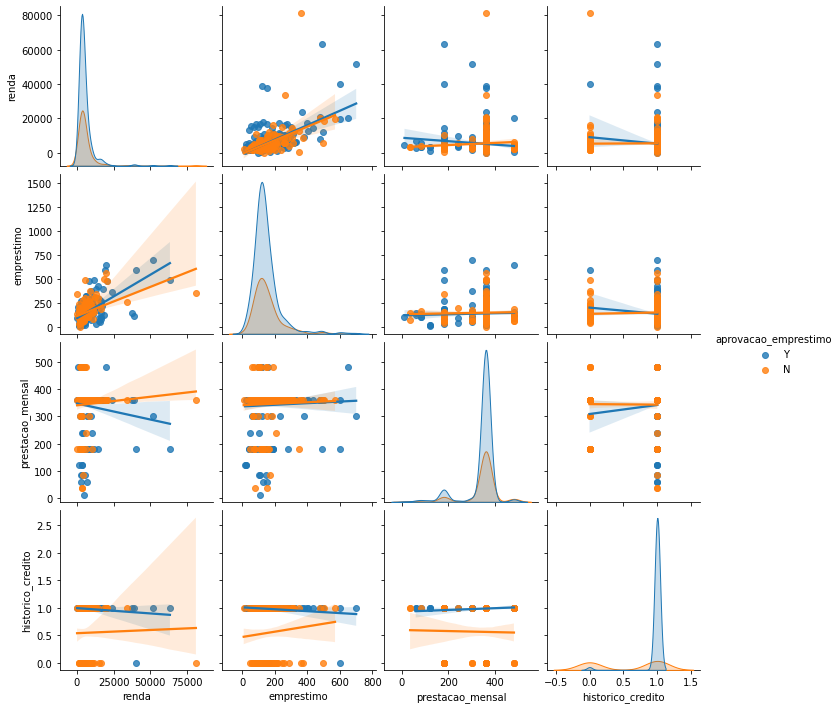

In [24]:
#Criação do gráfico de dispersão do tipo pairplot

sns.pairplot(clientes,hue='aprovacao_emprestimo',kind='reg')

O gráfico pairplot serve para se ter uma ideia geral da correlação entre todas as variáveis e ainda é possível observar o comportamento da reta de regressão.
Reta de regressão é a reta que mostra a tendência que uma variável tem em relação a outra. Por exemplo, existe uma tendência do valor pedido nos empréstimos aumentar com o aumento da renda e também existe a tendência do empréstimo ser aprovado com o aumento da renda do cliente.

# Pré processamento dos Dados

Vimos que nossos dados tem várias informações e algumas delas precisam ser tratadas antes de serem utilizadas num modelo de previsão

In [25]:
#Substituir caractere por números

clientes['sexo'] = clientes['sexo'].map({'Male':0,'Female':1})
clientes['estado_civil'] = clientes['estado_civil'].map({'No':0,'Yes':1})
clientes['aprovacao_emprestimo'] = clientes['aprovacao_emprestimo'].map({'N':0,'Y':1})
clientes.head(10)

,cod_cliente,sexo,estado_civil,dependentes,educacao,empregado,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,imovel,aprovacao_emprestimo
0,LP001002,0.0,0.0,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,1
5,LP001011,0.0,1.0,2,Graduate,Yes,5417,4196,267.0,360.0,1.0,Urban,1
6,LP001013,0.0,1.0,0,Not Graduate,No,2333,1516,95.0,360.0,1.0,Urban,1
7,LP001014,0.0,1.0,3+,Graduate,No,3036,2504,158.0,360.0,0.0,Semiurban,0
8,LP001018,0.0,1.0,2,Graduate,No,4006,1526,168.0,360.0,1.0,Urban,1
9,LP001020,0.0,1.0,1,Graduate,No,12841,10968,349.0,360.0,1.0,Semiurban,0


In [26]:
#Eliminando os valores nulos/ausentes

clientes = clientes.dropna()
clientes.isnull().sum()

cod_cliente             0
sexo                    0
estado_civil            0
dependentes             0
educacao                0
empregado               0
renda                   0
renda_conjuge           0
emprestimo              0
prestacao_mensal        0
historico_credito       0
imovel                  0
aprovacao_emprestimo    0
dtype: int64

Como é possível ver, a função dropna() eliminou todos os valores nulos/ausentes.

In [27]:
#Separadno variáveis explicativas e variável target

x = clientes[['sexo','estado_civil','renda','emprestimo','historico_credito']]
y = clientes['aprovacao_emprestimo']

#Verificação da dimensão dos conjuntos de dados

x.shape , y.shape 

((480, 5), (480,))

A etapa de separação dos dados é essencial para separar os dados explicativos, que trazem as informações que levamos em conta para tomar as decisões, e os dados target que são os resultados da avaliação. Nesse caso vamos usar o sexo, o estado civil, a renda, o empréstimo e o histórico de crédito do cliente para decidir se o empréstimo será aprovado ou não. Note que algumas variáveis não estão sendo levadas em consideração, como: nível escolar, local onde mora, dependentes, empregado, renda do conjuge, prestação mensal. Pois foi observado que não são variáveis que influenciam muito na aprovação do empréstimo.

In [29]:
#Importação do pacote para amostragem de dados

from sklearn.model_selection import train_test_split

In [30]:
#Realizando amostragem dos dados

x_train, x_teste, y_train, y_teste = train_test_split(x,y,test_size=0.2,random_state=7)

Esta função train_test_split serve para separar os dados que serão usados para treino da nossa máquina preditiva e os dados que serão usados para testar a eficiência da máquina

In [31]:
x_train.head()

,sexo,estado_civil,renda,emprestimo,historico_credito
172,0.0,1.0,3522,81.0,1.0
4,0.0,0.0,6000,141.0,1.0
566,0.0,0.0,3333,70.0,1.0
74,0.0,1.0,5266,187.0,1.0
417,0.0,1.0,1600,239.0,1.0


In [32]:
y_train

172    0
4      1
566    1
74     1
417    0
      ..
269    1
85     1
33     1
251    0
224    1
Name: aprovacao_emprestimo, Length: 384, dtype: int64

In [33]:
x_teste.head()

,sexo,estado_civil,renda,emprestimo,historico_credito
153,0.0,1.0,2281,113.0,1.0
573,0.0,1.0,6125,187.0,1.0
578,0.0,1.0,1782,107.0,1.0
485,0.0,1.0,1958,131.0,1.0
388,0.0,1.0,2333,136.0,1.0


In [34]:
y_teste

153    0
573    0
578    1
485    1
388    1
      ..
64     0
529    1
17     0
603    1
136    0
Name: aprovacao_emprestimo, Length: 96, dtype: int64

# Construção da Máquina Preditiva

In [35]:
#Importação do pacote para construção da máquina preditiva

##Algoritmo Random Forest

from sklearn.ensemble import RandomForestClassifier

In [36]:
#Criando a Máquina Preditiva com Random Forest

maquina = RandomForestClassifier()
maquina.fit(x_train,y_train)

RandomForestClassifier()

# Avaliando a Máquina Preditiva

In [37]:
#Importação da métrica de avaliação

from sklearn.metrics import accuracy_score

In [39]:
#Avaliando a acurácia da máquina preditiva com os dados de treino

pred_maquina = maquina.predict(x_train)
print('A acurácia da máquina foi de',round(accuracy_score(y_train,pred_maquina)*100,2),'%')

A acurácia da máquina foi de 100.0 %


Esse resultado era esperado, pois a máquina foi treinada com esses valores. Logo, é esperado que ela não erre no conjunto de dados de treino.

In [38]:
#Avaliando a acurácia da máquina preditiva com os dados de teste

pred_maquina = maquina.predict(x_teste)
print('A acurácia da máquina foi de',round(accuracy_score(y_teste,pred_maquina)*100,2),'%')

A acurácia da máquina foi de 75.0 %


## 2ª Versão da Máquina Preditiva

Tunando (calibrando) **Hiperparâmetros** do Algoritmo

### Usando Hiperparâmetros: "max_depth" para diminuir "overfiting"

In [40]:
maquina = RandomForestClassifier(max_depth=4, random_state=7)
maquina.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=7)

In [41]:
#Avaliando o desempenho da máquina nos dados de teste após modificar hiperparâmetros

pred_maquina = maquina.predict(x_teste)
print('A acurácia da máquina foi de',round(accuracy_score(y_teste,pred_maquina)*100,2),'%')

A acurácia da máquina foi de 78.12 %


Logo, após modificar o hiperparâmetro max_depth conseguimos melhorar a eficiência da nossa máquina preditiva

## Verificando as Variáveis Mais Importantes

[ 2.26187007  3.44782335 17.33214253 17.59317543 59.36498861]


Text(0.5, 1.0, 'Importância das Variáveis na Decisão de Aprovação de Empréstimos')

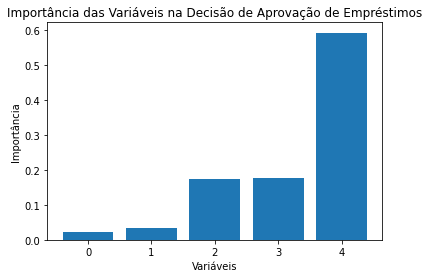

In [71]:
#Importância das variáveis

print(maquina.feature_importances_*100)

#Gráfico mostrando a importância das variáveis
from matplotlib import pyplot
g1 = pyplot.bar(range(len(maquina.feature_importances_)),maquina.feature_importances_)
pyplot.xlabel('Variáveis')
pyplot.ylabel('Importância')
pyplot.title('Importância das Variáveis na Decisão de Aprovação de Empréstimos')


- Variável 0 -> Sexo
- Variável 1 -> Estado Civil
- Variável 2 -> Renda
- Variável 3 -> Empréstimo
- Variável 4 -> Histórico de Crédito

Como podemos observar, a variável que mais afeta a aprovação de crédito ou não é o histórico de crédito do cliente. Basicamente se tem um histórico bom (1) a instituição financeira irá aceitar o pedido de empréstimo. O impacto da renda e do valor do empréstimo são razoáveis. Por outro lado o sexo e o estado civil do cliente não importam muito na decisão de aprovação.

# Criando Sistema WEB

## Salvando Máquina Preditiva para Criar um Sistema WEB

In [72]:
import pickle
pickle_out = open('maquina_preditiva.pkl',mode='wb')
pickle.dump(maquina,pickle_out)
pickle_out.close()

## Deploy - Implementando a Máquina Preditiva na WEB

### 1º Instalar o Pacote para Conexão do Sistema na WEB

In [73]:
%pip install -q pyngrok

Note: you may need to restart the kernel to use updated packages.


### 2º Instalar o Pacote para Implementação do Sistema WEB

In [ ]:
%pip install -q streamlit
%pip install -q streamlit_ace

### 3º Criar o Sistema

In [76]:
%%writefile app.py

#Importando Pacotes 
import pickle
import streamlit as st
 
# Carregando a Máquina Preditiva
pickle_in = open('maquina_preditiva.pkl', 'rb') 
maquina_preditiva = pickle.load(pickle_in)

#Manter a sessão em cache 
@st.cache()
  
# Criando a função que irá fazer a predição usando os dados impostados pelo usuário do Sistema 
def prediction(sexo, estado_civil, renda, emprestimo, historico_credito):   
 
    # Pre-processando a entrada do Usuário    
    if sexo == "Masculino":
        sexo = 0
    else:
        sexo = 1
 
    if estado_civil == "Solteiro(a)":
        estado_civil = 0
    else:
        estado_civil = 1
 
    if historico_credito == "Débitos Pendentes":
        historico_credito = 0
    else:
        historico_credito = 1  
 
    emprestimo = emprestimo / 1000
 
    # Fazendo Predições
    prediction = maquina_preditiva.predict( 
        [[sexo, estado_civil, renda, emprestimo, historico_credito]])
     
    if prediction == 0:
        pred = 'Rejeitado'
    else:
        pred = 'Aprovado'
    return pred
      
  
# Essa função é para criação da webpage  
def main():  

    # Elementos da webpage
    # Nesse Ponto vc deve Personalizar o Sistema com sua Marca
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">SAE</h1> 
    <h2 style ="color:black;text-align:center;">Sistema de Aprovação de Empréstimos</h2>
    <h3 style ="color:black;text-align:center;">by Diogo Monteiro do Nascimento</h3>
    </div>
    """
      
    # Função do stramlit que faz o display da webpage
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # As linhas abaixo criam as caixas na qual o usuário vai entrar com dados da pessoa que quer o empréstimo para fazer a Predição
    sexo = st.selectbox('Sexo',("Masculino","Feminino"))
    estado_civil = st.selectbox('Estado Civil',("Solteiro(a)","Casado(a)")) 
    renda = st.number_input("Renda Mensal") 
    emprestimo = st.number_input("Valor Total do Empréstimo")
    historico_credito = st.selectbox('Histórico de Créditos',("Sem Débitos","Débitos Pendentes"))
    result =""
      
    #Quando o Usuário clicar no botão "Verificar" a Máquina Preditiva faz seu trabalho
    if st.button("Verificar"): 
        result = prediction(sexo, estado_civil, renda, emprestimo, historico_credito) 
        st.success('O empréstimo foi {}'.format(result))
        print(emprestimo)
     
if __name__=='__main__': 
    main()

Writing app.py


### 4º Executar o Sistema 

In [ ]:
import sys
from streamlit import cli as stcli

if __name__ == '__main__':
    sys.argv = ["streamlit", "run", "app.py"]
    sys.exit(stcli.main())

### 5º Criar a Conexão do Sistema WEB

In [83]:
from pyngrok import ngrok

### 6º Publicar o Sistema numa URL

In [ ]:
public_url = ngrok.connect('8501')

### 7º Abrir o Sistema via Link que Contém a Palavra ngrok.io

In [86]:
public_url

<NgrokTunnel: "http://daf9-179-73-177-177.ngrok.io" -> "http://localhost:8501">

150.0
150.0
